In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_roc_curve
import matplotlib.pyplot as plt

### Data Transformation

In [2]:
df = pd.read_csv(r'..\\datasets\\diabetic_data.csv')

In [3]:
df.drop(columns = ['encounter_id','patient_nbr','weight', 'medical_specialty'], inplace=True)
df = df[df.race!='?']
df = df[df.gender!='Unknown/Invalid']
df = df[df.payer_code!='?']
df.replace(to_replace=['Steady', 'Down', 'Up', '>30', '<30'], value='Yes', inplace=True)

In [4]:
df_breakout = pd.get_dummies(df, columns=["race","gender", "age", "admission_type_id", "discharge_disposition_id","admission_source_id",
                                          "payer_code", "diag_1", "diag_2", "diag_3", "max_glu_serum", "A1Cresult", "metformin", "repaglinide",
                                          "nateglinide", "chlorpropamide", "glimepiride", "acetohexamide", "glipizide", "glyburide", "tolbutamide",
                                          "pioglitazone", "rosiglitazone", "acarbose", "miglitol", "troglitazone", "tolazamide", "examide", "citoglipton",
                                          "insulin", "glyburide-metformin", "glipizide-metformin", "glimepiride-pioglitazone", "metformin-rosiglitazone",
                                          "metformin-pioglitazone", "change", "diabetesMed"], drop_first=True)

**Split dataset into train and test sets**

In [5]:
X = df_breakout.drop(columns = 'readmitted')
y = df_breakout.readmitted
y.replace(to_replace=['>30', '<30'], value='YES', inplace=True)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

### Ridge Classifier

In [7]:
rdg = RidgeClassifier(alpha=70).fit(X_train, y_train)

prediction = rdg.predict(X_test)
predSeries = pd.Series(prediction)

In [8]:
rdg.score(X_test, y_test)

0.6492038003479191

In [9]:
y_test = y_test.reset_index(drop = 'True')
ML_result = pd.concat([y_test, predSeries], axis=1)
ML_result.columns = ['True','Predicted']
confusion_matrix = pd.crosstab(ML_result['True'], ML_result['Predicted'], rownames=['Actual'], colnames=['Predicted'])
print (confusion_matrix)

Predicted    NO   Yes
Actual               
NO         5915  2032
Yes        3211  3788


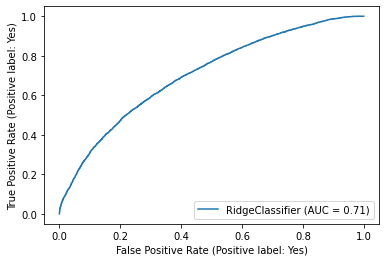

In [10]:
rdg_disp = plot_roc_curve(rdg, X_test, y_test)
plt.show()

### Random Forest Classifier

In [11]:
clf = RandomForestClassifier(n_estimators = 500, criterion = 'gini', max_features = 'sqrt', random_state=0, n_jobs = -1)
clf.fit(X_train, y_train)

prediction = clf.predict(X_test)
predSeries = pd.Series(prediction)

In [12]:
clf.score(X_test, y_test)

0.6552254783888666

In [13]:
y_test = y_test.reset_index(drop = 'True')
ML_result = pd.concat([y_test, predSeries], axis=1)
ML_result.columns = ['True','Predicted']
confusion_matrix = pd.crosstab(ML_result['True'], ML_result['Predicted'], rownames=['Actual'], colnames=['Predicted'])
print (confusion_matrix)

Predicted    NO   Yes
Actual               
NO         5816  2131
Yes        3022  3977


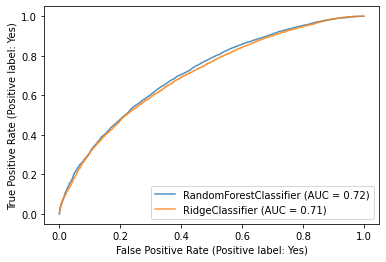

In [14]:
ax = plt.gca()
rfc_disp = plot_roc_curve(clf, X_test, y_test, ax=ax, alpha=0.8)
rdg_disp.plot(ax=ax, alpha=0.8)
plt.show()

### SGD Classifier

In [15]:
sgd = make_pipeline(StandardScaler(),SGDClassifier(loss = 'log', penalty = 'l1', max_iter = 1000, verbose = False, n_jobs = -1, n_iter_no_change = 5, alpha = 0.0001))
sgd.fit(X_train, y_train)

prediction = sgd.predict(X_test)
predSeries = pd.Series(prediction)

sgd.score(X_test, y_test)

C:\Users\kaigu\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.6402381908202863

In [16]:
y_test = y_test.reset_index(drop = 'True')
ML_result = pd.concat([y_test, predSeries], axis=1)
ML_result.columns = ['True','Predicted']
confusion_matrix = pd.crosstab(ML_result['True'], ML_result['Predicted'], rownames=['Actual'], colnames=['Predicted'])
print (confusion_matrix)

Predicted    NO   Yes
Actual               
NO         5596  2351
Yes        3026  3973


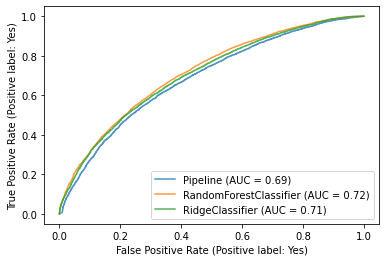

In [17]:
ax = plt.gca()
sgd_disp = plot_roc_curve(sgd, X_test, y_test, ax=ax, alpha=0.8)
rfc_disp.plot(ax=ax, alpha=0.8)
rdg_disp.plot(ax=ax, alpha=0.8)
plt.show()

### K-Nearest Neighbors Classifier

In [18]:
knn = KNeighborsClassifier(n_neighbors=11, leaf_size= 1, p=1,n_jobs=-1)
# neigh = KNeighborsClassifier()
knn.fit(X_train, y_train)


KNeighborsClassifier(leaf_size=1, n_jobs=-1, n_neighbors=11, p=1)

In [19]:
y_pred = knn.predict(X_test)
predSeries = pd.Series(y_pred)
knn.score(X_test, y_test)

0.5928007493643784

In [20]:
y_test = y_test.reset_index(drop = 'True')
ML_result = pd.concat([y_test, predSeries], axis=1)
ML_result.columns = ['True','Predicted']
confusion_matrix = pd.crosstab(ML_result['True'], ML_result['Predicted'], rownames=['Actual'], colnames=['Predicted'])
print (confusion_matrix)

Predicted    NO   Yes
Actual               
NO         5450  2497
Yes        3589  3410


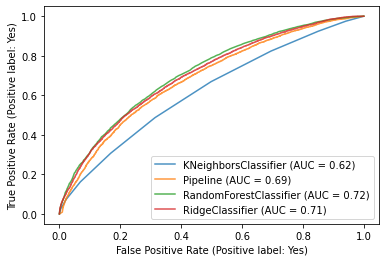

In [21]:
ax = plt.gca()
knn_disp = plot_roc_curve(knn, X_test, y_test, ax=ax, alpha=0.8)
sgd_disp.plot(ax=ax, alpha=0.8)
rfc_disp.plot(ax=ax, alpha=0.8)
rdg_disp.plot(ax=ax, alpha=0.8)
plt.show()

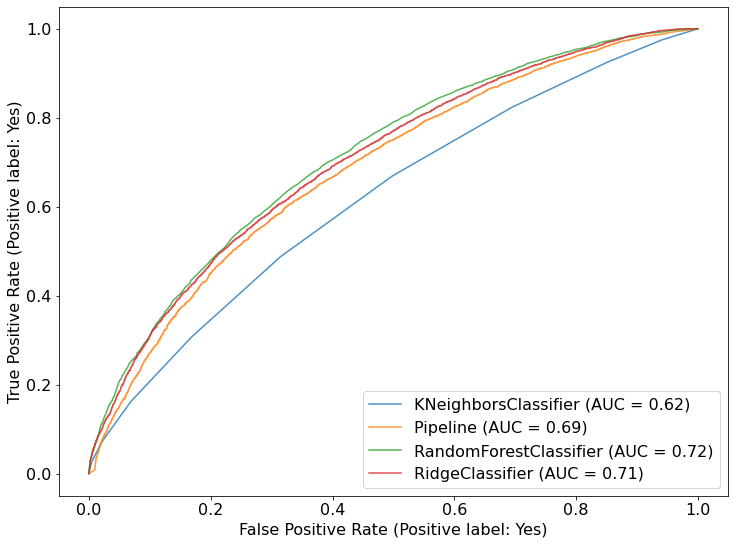

In [22]:
plt.rcParams["figure.figsize"] = (12, 9)
plt.rcParams.update({'font.size': 16})

ax = plt.gca()
knn_disp.plot(ax=ax, alpha=0.8)
sgd_disp.plot(ax=ax, alpha=0.8)
rfc_disp.plot(ax=ax, alpha=0.8)
rdg_disp.plot(ax=ax, alpha=0.8)
plt.show()